# 🧠 Analyse des Données de Santé Publique

---

## 🎯 Contexte

Vous travaillez en tant qu'analyste de données au sein d'une organisation gouvernementale ou d'un institut de recherche en santé publique.
Votre mission consiste à :

* Analyser un jeu de données contenant des informations démographiques, comportementales et biométriques sur une population.
* Identifier les facteurs influençant la santé (par exemple, tabagisme, niveau d'éducation, BMI).
* Produire des rapports et des visualisations pour soutenir les décideurs dans l'élaboration de politiques de santé adaptées.

---

## ✅ Étapes Clés du Projet

### 1️⃣ Charger le jeu de données à l'aide de Pandas

In [945]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from   sqlalchemy import  create_engine, func ,case ,select, MetaData, Table, Column, Integer, String, DateTime, ForeignKey, Numeric

df= pd.read_csv("DataSet.csv")
df= pd.DataFrame(df)
df

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


### 2️⃣ Afficher la taille (dimensions) du dataset (lignes, colonnes)

In [946]:
dim=df.shape
print(f"nb de lignes: {dim[0]} \nnb de colonnes: {dim[1]}")



nb de lignes: 5735 
nb de colonnes: 28


### 3️⃣ Lister les colonnes disponibles dans le dataset

In [947]:
print("Les colonnes du DataFrame sont :")
df.columns


Les colonnes du DataFrame sont :


Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

### 4️⃣ Créer un sous-ensemble du jeu de données contenant uniquement les colonnes suivantes :

`['SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI']`

In [948]:
df1= df[['SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI']]
df1

,SEQN,SMQ020,RIAGENDR,RIDAGEYR,DMDEDUC2,BMXWT,BMXHT,BMXBMI
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3
...,...,...,...,...,...,...,...,...
5730,93695,1,2,76,3.0,59.1,165.8,21.5
5731,93696,2,1,26,5.0,112.1,182.2,33.8
5732,93697,1,2,80,4.0,71.7,152.2,31.0
5733,93700,1,1,35,1.0,78.2,173.3,26.0


### 5️⃣ Afficher les informations générales (.info()) sur ce sous-ensemble

In [949]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB


### 6️⃣ Renommer les colonnes avec des noms plus explicites :

`['seqn','smoking','gender', 'age','education','weight','height','bmi']`

In [950]:
df1=df1.rename(columns={'SEQN': 'seqn', 'SMQ020': 'smoking', 'RIAGENDR': 'gender', 'RIDAGEYR': 'age', 'DMDEDUC2': 'education', 'BMXWT': 'weight', 'BMXHT': 'height', 'BMXBMI': 'bmi'}) 
df1 

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3
...,...,...,...,...,...,...,...,...
5730,93695,1,2,76,3.0,59.1,165.8,21.5
5731,93696,2,1,26,5.0,112.1,182.2,33.8
5732,93697,1,2,80,4.0,71.7,152.2,31.0
5733,93700,1,1,35,1.0,78.2,173.3,26.0


### 7️⃣ Vérifier la présence de doublons dans le dataset

In [951]:
print("le nb de doublons :",df1.duplicated().sum())


le nb de doublons : 0


### 8️⃣ Supprimer les doublons si nécessaire

In [952]:
df1.drop_duplicates()

,seqn,smoking,gender,age,education,weight,height,bmi
0,83732,1,1,62,5.0,94.8,184.5,27.8
1,83733,1,1,53,3.0,90.4,171.4,30.8
2,83734,1,1,78,3.0,83.4,170.1,28.8
3,83735,2,2,56,5.0,109.8,160.9,42.4
4,83736,2,2,42,4.0,55.2,164.9,20.3
...,...,...,...,...,...,...,...,...
5730,93695,1,2,76,3.0,59.1,165.8,21.5
5731,93696,2,1,26,5.0,112.1,182.2,33.8
5732,93697,1,2,80,4.0,71.7,152.2,31.0
5733,93700,1,1,35,1.0,78.2,173.3,26.0


### 9️⃣ Supprimer la colonne 'seqn', considérée comme un identifiant inutile pour l'analyse

In [953]:
df1.drop('seqn', axis=1, inplace=True)
df1


,smoking,gender,age,education,weight,height,bmi
0,1,1,62,5.0,94.8,184.5,27.8
1,1,1,53,3.0,90.4,171.4,30.8
2,1,1,78,3.0,83.4,170.1,28.8
3,2,2,56,5.0,109.8,160.9,42.4
4,2,2,42,4.0,55.2,164.9,20.3
...,...,...,...,...,...,...,...
5730,1,2,76,3.0,59.1,165.8,21.5
5731,2,1,26,5.0,112.1,182.2,33.8
5732,1,2,80,4.0,71.7,152.2,31.0
5733,1,1,35,1.0,78.2,173.3,26.0




### 🔟 Identifier les valeurs manquantes (NaN) dans les colonnes


In [954]:
# Display les valeurs manquantes
print("les valeurs manquantes :")
df1.isnull().sum()

les valeurs manquantes :


smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64



### 1️⃣1️⃣ Remplacer les valeurs manquantes :

* `education` : remplacer par la médiane
* `weight`, `height`, `bmi` : remplacer par la moyenne



In [955]:
df1['education']=df1['education'].fillna(df1['education'].median())
df1['weight']=df1['weight'].fillna(df1['weight'].mean())
df1['height']=df1['height'].fillna(df1['height'].mean())
df1['bmi']=df1['bmi'].fillna(df1['bmi'].mean())



### 1️⃣2️⃣ Afficher les statistiques descriptives (moyenne, écart-type, min, max, etc.) du dataset


In [956]:
df1.describe()

,smoking,gender,age,education,weight,height,bmi
count,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000,5735.000000
mean,1.607149,1.518919,48.052310,3.467132,81.342676,166.142834,29.382197
std,0.571975,0.499686,18.431011,1.284826,21.633062,10.024624,7.050607
min,1.000000,1.000000,18.000000,1.000000,32.400000,129.700000,14.500000
25%,1.000000,1.000000,32.000000,3.000000,66.100000,158.750000,24.400000
50%,2.000000,2.000000,48.000000,4.000000,78.400000,166.142834,28.400000
75%,2.000000,2.000000,63.000000,4.000000,92.600000,173.400000,33.000000
max,9.000000,2.000000,80.000000,9.000000,198.900000,202.700000,67.300000



### 1️⃣3️⃣ Détecter les valeurs aberrantes (outliers) à l'aide de méthodes statistiques

In [957]:
cols = df1.select_dtypes(include=['number']).columns.tolist()
for col in cols:
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    v_min=Q1 - 1.5 * IQR
    v_max=Q3 + 1.5 * IQR
    condition = (df1[col] < v_min) | (df1[col] > v_max)
    outliers = df1[condition]
    df_clean = df1[~condition]
print("Les valeurs aberrantes détectées :")
print(outliers)
print(f"la dimension : {df1.shape}")    
print("les valeurs aberrantes ont été supprimées")
df1 = df_clean.reset_index(drop=True)
print("le nb de lignes après suppression des valeurs aberrantes :", df1.shape[0])



Les valeurs aberrantes détectées :
      smoking  gender  age  education  weight  height   bmi
128         2       2   22        4.0   126.3   162.9  47.6
131         2       2   44        4.0   147.0   167.9  52.1
150         2       2   41        3.0   121.9   156.4  49.8
170         2       2   60        4.0   158.2   164.1  58.7
255         1       1   52        3.0   150.0   174.9  49.0
...       ...     ...  ...        ...     ...     ...   ...
5590        1       1   38        4.0   178.3   184.6  52.3
5619        2       2   54        4.0   123.0   159.0  48.7
5638        2       2   31        2.0   123.4   160.9  47.7
5686        2       2   60        3.0   123.8   149.9  55.1
5716        1       2   73        1.0   119.6   149.0  53.9

[163 rows x 7 columns]
la dimension : (5735, 7)
les valeurs aberrantes ont été supprimées
le nb de lignes après suppression des valeurs aberrantes : 5572




### 1️⃣5️⃣ Remplacer les codes numériques par des labels explicites dans trois colonnes :

* `smoking` : `{1: 'yes', 2: 'no', 7: nan, 8: nan}`
* `gender` : `{1: 'male', 2: 'female'}`
* `education` :
  `{1: '<9th grade', 2: '9-11th grade', 3: 'HS or GED', 4: 'Some college / AA', 5: 'College or above', 7: 'Other', 8: 'Other'}`



In [958]:

df1['smoking'] = df1['smoking'].replace({
    1: 'yes', 2: 'no', 7: np.nan, 8: np.nan, 9: np.nan
})

df1['gender'] = df1['gender'].replace({
    1: 'male', 2: 'female'
})

df1['education'] = df1['education'].replace({
    1: '<9th grade',
    2: '9-11th grade',
    3: 'HS or GED',
    4: 'Some college / AA',
    5: 'College or above',
    7: 'Other',
    8: 'Other'
})
df1



,smoking,gender,age,education,weight,height,bmi
0,yes,male,62,College or above,94.8,184.5,27.8
1,yes,male,53,HS or GED,90.4,171.4,30.8
2,yes,male,78,HS or GED,83.4,170.1,28.8
3,no,female,56,College or above,109.8,160.9,42.4
4,no,female,42,Some college / AA,55.2,164.9,20.3
...,...,...,...,...,...,...,...
5567,yes,female,76,HS or GED,59.1,165.8,21.5
5568,no,male,26,College or above,112.1,182.2,33.8
5569,yes,female,80,Some college / AA,71.7,152.2,31.0
5570,yes,male,35,<9th grade,78.2,173.3,26.0




### 1️⃣6️⃣ Analyser les relations entre variables :

* Utiliser Seaborn Pairplot pour visualiser les relations entre toutes les variables
* Créer des graphiques individuels pour observer la distribution ou la corrélation de chaque attribut

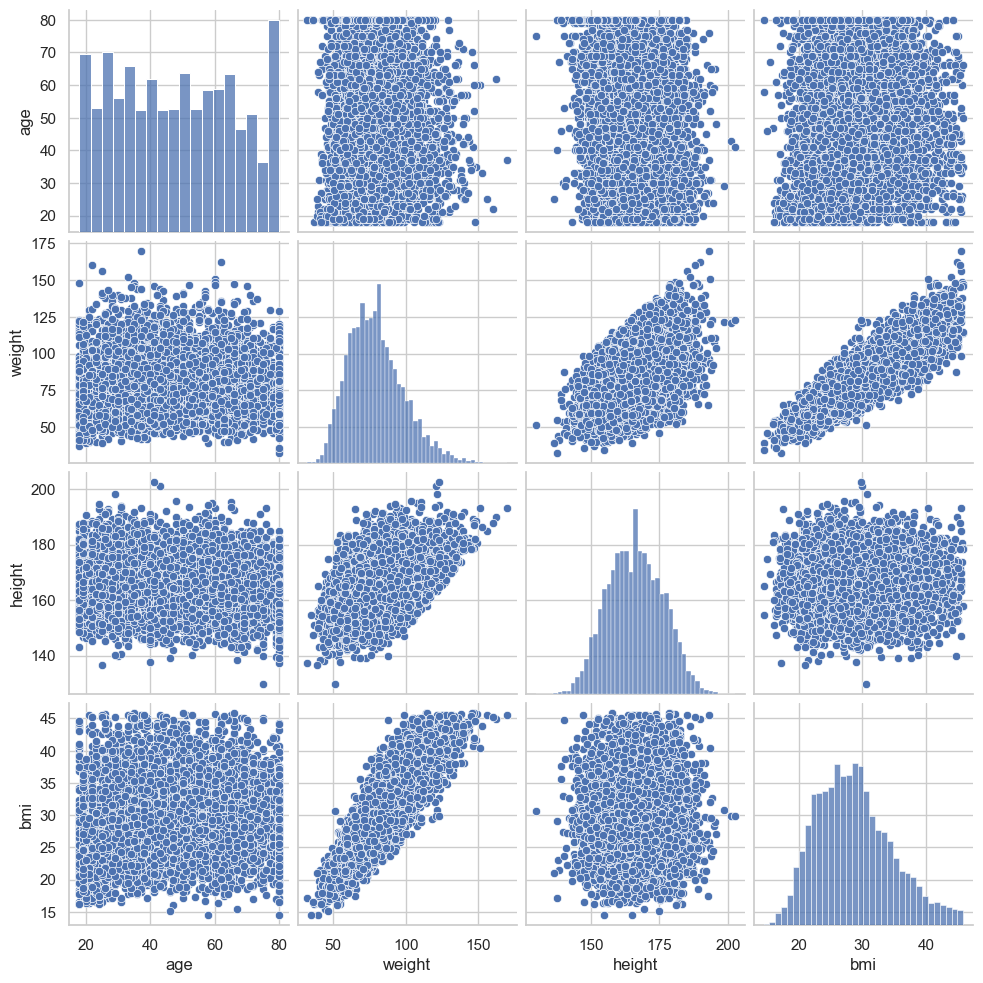

In [959]:
sns.pairplot(df1)

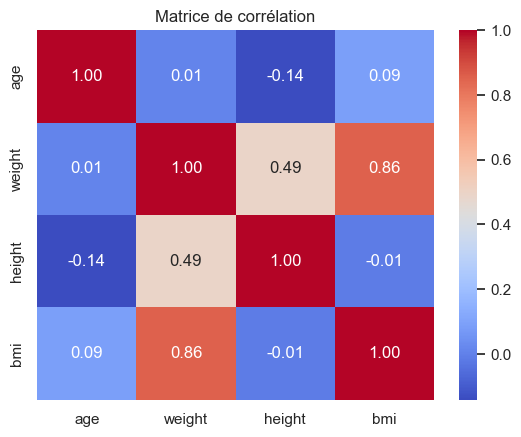

In [960]:
corr = df_clean[['age', 'weight', 'height', 'bmi']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()




### 1️⃣7️⃣ Sauvegarder le dataset nettoyé au format CSV (ou autre)


In [961]:

df1.to_csv('health_data_cleaned.csv', index=False)
print("Dataset nettoyé sauvegardé sous 'health_data_cleaned.csv'")
print(f"Dimensions du dataset final: {df1.shape}")
print(f"Colonnes: {list(df1.columns)}")

Dataset nettoyé sauvegardé sous 'health_data_cleaned.csv'
Dimensions du dataset final: (5572, 7)
Colonnes: ['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi']



## 🧮 Les requêtes SQL via SQLAlchemy

### 1️⃣8️⃣ Insérer les données nettoyées dans une table PostgreSQL nommée, par exemple : `health_data_cleaned`

In [962]:
db_host = "localhost"
db_port = 5432
db_user = "postgres"
db_password = "2001casa"
db_name = "health_data"
engine = create_engine(f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}')

def execute_query(statement):
    with engine.connect() as conn:
        return conn.execute(statement).fetchall()


In [963]:
try:
    with engine.connect() as connection:
   

        # Insérer ou remplacer la table 'health_data_cleaned'
        df1.to_sql('health_data_cleaned', engine, if_exists='replace', index=False)
        print("Données insérées dans la table 'health_data_cleaned'")
except Exception as e:
    print("Erreur lors de l'insertion :", e)


Données insérées dans la table 'health_data_cleaned'


Élément	Explication
df_subset	Ton DataFrame Pandas contenant les données nettoyées que tu veux envoyer dans la base de données PostgreSQL.
.to_sql()	Une méthode de Pandas qui permet de sauvegarder un DataFrame dans une table SQL directement.
'health_data_cleaned'	Le nom de la table que tu veux créer dans la base de données. Si elle n'existe pas, elle sera créée automatiquement.
engine	L'objet de connexion SQLAlchemy que tu as créé avec create_engine(). Il permet à Pandas de savoir où se trouve la base de données.
if_exists='replace'	Ce paramètre contrôle ce qu’il faut faire si la table existe déjà :

### 1️⃣9️⃣ Quelle est la répartition des individus par genre (gender) ?

```sql
SELECT gender, COUNT(*) as count
FROM your_table
GROUP BY gender;


In [964]:

try:
    metadata = MetaData()
    metadata.reflect(bind=engine)
    health_data_cleaned = metadata.tables['health_data_cleaned']

    gender_count = select(health_data_cleaned.c.gender, func.count().label('total')).group_by(health_data_cleaned.c.gender)
    results = execute_query(gender_count)

    print("Répartition par genre :")
    for row in results:
        print(f"{row.gender}: {row.total}")

except Exception as e:
    print("Erreur :", e)


Répartition par genre :
female: 2863
male: 2709




### 2️⃣0️⃣ Quelle est la répartition des individus en fonction de leurs habitudes de tabagisme (smoking) ?

```sql
SELECT smoking, COUNT(*) as count
FROM your_table
GROUP BY smoking;


In [965]:
try :
   
    smoking_repa = select(
        health_data_cleaned.c.smoking,
        func.count().label('total')
    ).group_by(health_data_cleaned.c.smoking)

    results = execute_query(smoking_repa)

    print("Âge moyen par habitude de tabagisme :")
    for row in results:
        print(f"{row.smoking}: {row.total}")
except Exception as e:
    print("Erreur :", e)

Âge moyen par habitude de tabagisme :
None: 10
yes: 2257
no: 3305




### 2️⃣1️⃣ Quelle est la moyenne de l'IMC (bmi) pour chaque genre (gender) ?

```sql
SELECT gender, AVG(bmi) as average_bmi
FROM your_table
GROUP BY gender;
```



In [966]:
try :
    bmi_avg= select (
        health_data_cleaned.c.gender,
        func.avg(health_data_cleaned.c.bmi).label('average_bmi')
    ).group_by(health_data_cleaned.c.gender)

    results= execute_query(bmi_avg)
    print("BMI moyen par genre :")
    for row in results:
        print(f"{row.gender}: {row.average_bmi}")

except Exception as e:
    print("Erreur :", e)

BMI moyen par genre :
female: 29.069762594241066
male: 28.38215949842872



### 2️⃣2️⃣ Comment les individus se répartissent-ils en fonction de leur niveau d'éducation (education) ?

```sql
SELECT education, COUNT(*) as count
FROM your_table
GROUP BY education;
```


In [967]:
try:
    education_count = select(
        health_data_cleaned.c.education,
        func.count().label('count')
    ).group_by(health_data_cleaned.c.education)
    results= execute_query(education_count) 
    for row in results:
        print(f"{row.education}: {row.count}")
except Exception as e:
    print("Erreur :", e)

College or above: 1341
<9th grade: 646
HS or GED: 1144
9-11th grade: 623
Some college / AA: 1815
9.0: 3




### 2️⃣3️⃣ Quelle est l'évolution de l'IMC moyen (bmi) en fonction des tranches d'âge (par exemple, 18-30, 31-50, 51+) ?

```sql
SELECT 
  CASE 
    WHEN age BETWEEN 18 AND 30 THEN '18-30'
    WHEN age BETWEEN 31 AND 50 THEN '31-50'
    ELSE '51+' 
  END as age_range,
  AVG(bmi) as average_bmi
FROM your_table
GROUP BY age_range;
```


In [968]:

try :
    age_group = case(
        (health_data_cleaned.c.age.between(18, 30), '18-30'),
        (health_data_cleaned.c.age.between(31, 50), '31-50'),
        (health_data_cleaned.c.age >= 51, '51+'),
        else_='Unknown'
    ).label('age_group')
    mbi_age_group = select(
        age_group,
    (func.avg(health_data_cleaned.c.bmi)).label('avg_bmi')
    ).group_by(age_group).order_by(age_group)
    results= execute_query(mbi_age_group)
    print("\nÉvolution de l'IMC moyen par tranche d'âge :")
    for row in results :
        print(f"{row.age_group}: {row.avg_bmi}")
except Exception as e:
    print("Erreur :", e)
       



Évolution de l'IMC moyen par tranche d'âge :
18-30: 27.07543850274598
31-50: 29.41226912725687
51+: 29.08425660307709


### 2️⃣4️⃣ Quelle est la moyenne d'âge (age) pour chaque catégorie de tabagisme (smoking) ?

```sql
SELECT smoking, AVG(age) as average_age
FROM your_table
GROUP BY smoking;
```

In [969]:
try:
    smoking_age= select (
        health_data_cleaned.c.smoking,
        func.round(func.avg(health_data_cleaned.c.age), 2).label('average_age'),
    ).group_by(health_data_cleaned.c.smoking)
    results= execute_query(smoking_age)
    for row in results:
        print(f"{row.smoking}: {row.average_age}")
        
except Exception as e:
    print(f"❌ Erreur lors de l'exécution de la requête: {e}")

None: 61.30
yes: 52.25
no: 45.26
